<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

### 1.2 NumPy’s PRNG

In [4]:
np.random.rand()

0.18377395686756648

In [5]:
np.random.rand(10)

array([0.53515713, 0.31894515, 0.64800842, 0.1279416 , 0.5101792 ,
       0.04534804, 0.70146623, 0.38751754, 0.00810137, 0.77044581])

In [6]:
np.random.rand(5,2)

array([[0.54624606, 0.64752715],
       [0.72443597, 0.20701531],
       [0.59738765, 0.39332472],
       [0.69585862, 0.22026974],
       [0.77401832, 0.20806901]])

In [13]:
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers < 0.5) / n * 100

49.33

In [11]:
np.sum(random_numbers < 0.25) / n * 100

24.59

In [18]:
np.sum(random_numbers > 0.75) / n * 100

25.840000000000003

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

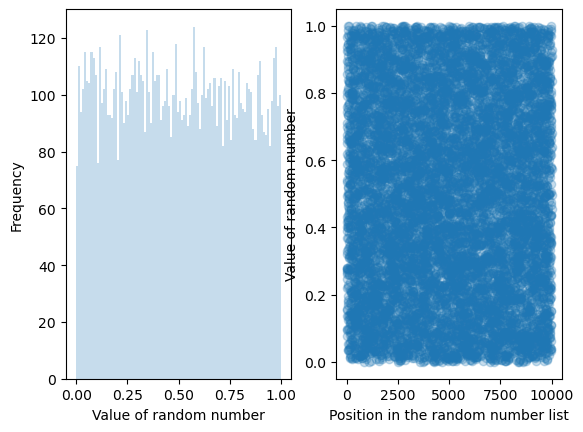

In [23]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = 0.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = 0.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")


### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

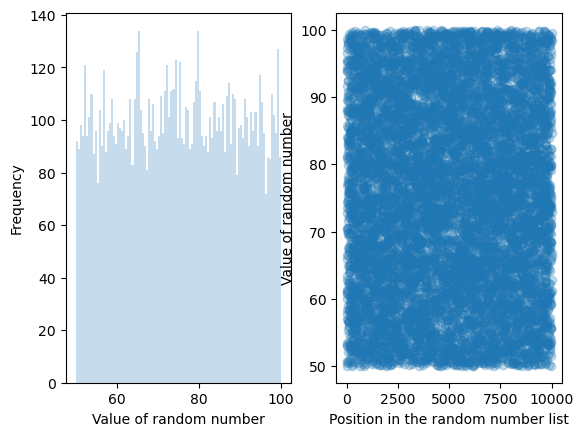

In [24]:
n = 10000
random_numbers = np.random.uniform(low = 50, high = 100, size = n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = 0.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = 0.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [25]:
np.random.randint(0, 100, 10)

array([74, 71, 41, 12, 56, 15, 73, 20, 42, 15])

In [26]:
np.random.randint(0, 100, 10)

array([38, 78, 19, 92, 83,  1, 64, 31, 90, 25])

In [27]:
np.random.seed(1234)
np.random.randint(0, 100, 10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [28]:
np.random.seed(1234)
np.random.randint(0, 100, 10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [29]:
np.random.seed(5678)
np.random.randint(0, 100, 10)

array([23, 62, 18, 63, 60, 13, 36, 59, 78, 31])

In [30]:
np.random.seed(5678)
np.random.randint(0, 100, 10)

array([23, 62, 18, 63, 60, 13, 36, 59, 78, 31])

## 2 Simulating a Magic-8 Ball

In [31]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
              'Without a doubt.', 'Yes definitely.', 
              'You may rely on it', 'As I see it, yes',
              'Most likely.', 'Outlook good.',
              'Yes.', 'Signs point to yes.',
              'Reply hazy, try again', 'Ask again later.',
              'Better not tell you now.', 'Cannot predict now.',
              'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.' 'My sources say no.',
              'Outlook not so good.', 'Very doubtful.']
    
    return np.random.choice(options)

In [32]:
questions = ['Will I be pretty?',
            'Will I be rich?',
            'Will I be in trouble?']

In [36]:
for question in questions: 
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Yes definitely.

Q: Will I be rich?
A: Outlook not so good.

Q: Will I be in trouble?
A: Reply hazy, try again



## 3 Flipping Coins

### 3.1 A fair coin

In [6]:
np.random.choice(['Head', 'Tail'])

'Head'

In [7]:
no_of_coins = 10
np.random.choice(['Head', 'Tail'], no_of_coins)

array(['Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Tail', 'Head',
       'Tail', 'Tail'], dtype='<U4')

In [8]:
def flip_coins(no_of_coins = 1, probability = 0.5):
    '''
    Returns the number of values greater than 
    'probability' (considered as 'Heads'). 
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [9]:
no_of_coins = 1000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins * 100: .2f}%')

Number of heads:  48.80%


### 3.2 A biased coin

In [10]:
no_of_coins = 1000
no_of_heads = flip_coins(no_of_coins, probability = 0.3)
print(f'Number of heads: {no_of_heads/no_of_coins * 100:.2f}%')

Number of heads: 70.20%


### 3.3 A flipping experiment

In [11]:
no_of_repeats = 10000
result = [flip_coins(no_of_coins = 10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts = True)

In [12]:
heads_probability = heads_counts/no_of_repeats

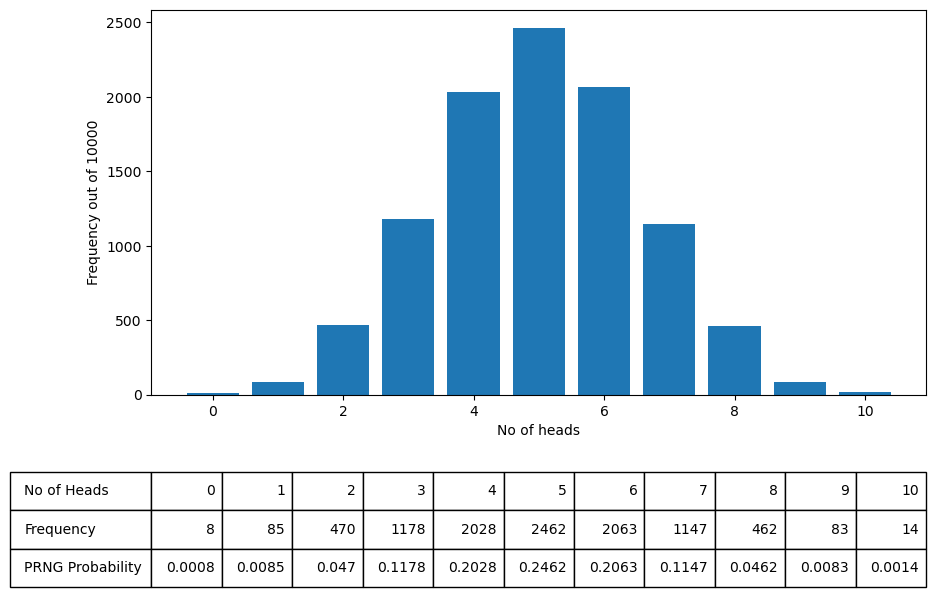

In [17]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels = ['No of Heads', 'Frequency', 'PRNG Probability'],
          loc = 'bottom', 
          bbox = [0, -0.5, 1, 0.3])

In [2]:
from scipy.stats import binom

In [3]:
binom.pmf(k = 7, n = 10, p = 0.5)

0.11718749999999996

## Exercise 1 :  12C, 13C

In [2]:
def carbon(no_of_carbon, probability):
    results_of_carbon = np.random.rand(no_of_carbon)
    no_of_carbon_13 = np.sum(results_of_carbon > probability)
    return no_of_carbon_13

In [17]:
carbon(27, 0.9889)

0

In [24]:
no_repeats = 100000
carbon_result = [carbon(27, 0.9889) for _ in range(no_repeats)]

In [25]:
np.mean(carbon_result)

0.30029

In [26]:
np.std(carbon_result)

0.5446245641724214

In [28]:
no_of_carbon13, carbon13_counts = np.unique(carbon_result, return_counts = True)

In [29]:
carbon13_probability = carbon13_counts / no_repeats

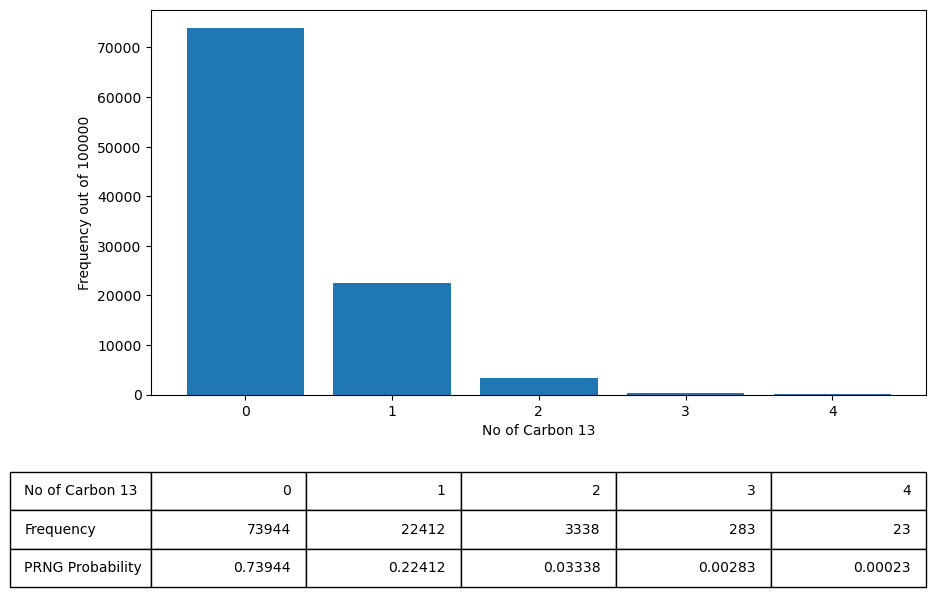

In [30]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(no_of_carbon13, carbon13_counts);
plt.xlabel('No of Carbon 13')
plt.ylabel(f'Frequency out of {no_repeats}')
plt.table([no_of_carbon13, carbon13_counts, carbon13_probability],
          rowLabels = ['No of Carbon 13', 'Frequency', 'PRNG Probability'],
          loc = 'bottom', 
          bbox = [0, -0.5, 1, 0.3])

Probability that that a cholesterol molecule has no atoms of Carbon-13 = 0.73944